In [1]:
import sys
import os
import subprocess
from math import *
import numpy as np
from datetime import *
from pylab import *
import matplotlib as mpl
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
from astropy.table import Table, Column 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from optparse import OptionParser
from PIL import Image#, ImageTk
from subprocess import Popen, PIPE
import matplotlib.patches as patches
import scipy.misc as scimisc

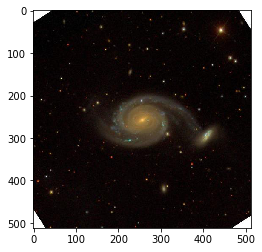

In [2]:
img = Image.open('../galaxies/pgc72387_d25x2_rot_gri.sdss.jpg')

# image = np.asarray(rsize)

plt.imshow(img)


/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imrotate` is deprecated!
`imrotate` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.rotate`` instead.
  """Entry point for launching an IPython kernel.


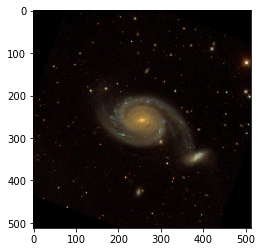

In [3]:
img_rot = scimisc.imrotate(img, -20, interp='bilinear')
plt.imshow(img_rot)


/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `imrotate` is deprecated!
`imrotate` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.rotate`` instead.


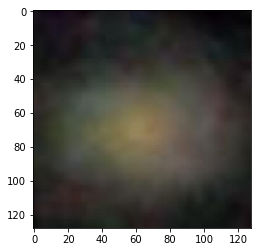

In [4]:
# img = Image.open('../galaxies/pgc72387_d25x2_rot_gri.sdss.jpg')
# angle = 19.00000
# scale = 1.69351

# img = Image.open('../galaxies/pgc2621_d25x2_rot_gri.sdss.jpg')
# angle = 181.00000
# scale = 2.58122

# img = Image.open('../galaxies/pgc619_d25x2_rot_gri.sdss.jpg')
# angle =  -167.00000
# scale = 2.09076

img = Image.open('../galaxies/pgc3957878_d25x2_rot_gri.sdss.jpg')
angle = 0
scale = 1.0


img_rot = scimisc.imrotate(img, -angle, interp='bilinear')

img_rot = np.asarray(img_rot)

N = img_rot.shape
d = N[0]
p =  int(d/scale)
d1 = d/2-p/2
d2 = d1 + p

img_cut = img_rot[d1:d2, d1:d2, :]

img = Image.fromarray(img_cut, 'RGB').resize((128,128))

plt.imshow(img)

np.asarray(img).shape


img.save("test.jpg", "JPEG")

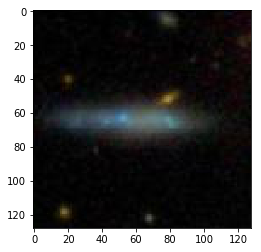

In [5]:
img = Image.open('128x128/pgc1528614_128x128_84.jpg')
img_arr = np.asarray(img)

plt.imshow(np.flip(np.flip(img_arr, axis=0),axis=1))

In [6]:
def inc_class(inc):
    
    if inc=='0':
        return 0
    elif inc=='F':
        return 1
    else:
#         return (int(inc)-1)/5-6
        return int(inc)

In [7]:
import glob
files = glob.glob('128x128/*jpg')
N = 4*len(files)

images = np.zeros((N, 128, 128, 3), dtype=np.dtype('>i4'))

# firs index for pgcID
# second index for labels
labels = np.zeros((2, N), dtype=np.dtype('>i4'))

for i, fname in enumerate(files):
    pgcID =  int(fname.split("/")[1].split('_')[0][3:])
    
    try:
        inc   =  fname.split("_")[2].split('.')[0]
    except:
        print fname
        sys.exit()  
        
    
    img = np.asarray(Image.open(fname))
    images[4*i] = img
    images[4*i+1] = np.flip(img, axis=0)
    images[4*i+2] = np.flip(img, axis=1)
    images[4*i+3] = np.flip(np.flip(img, axis=0),axis=1)
    
    clss = inc_class(inc)
    labels[1][4*i] = clss
    labels[1][4*i+1] = clss
    labels[1][4*i+2] = clss
    labels[1][4*i+3] = clss
    
    labels[0][4*i]   = pgcID
    labels[0][4*i+1] = pgcID
    labels[0][4*i+2] = pgcID
    labels[0][4*i+3] = pgcID    

5807387 0


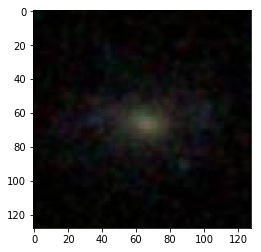

In [8]:
i = 1400
print labels[0][i], labels[1][i]
plt.imshow(images[i])

In [9]:
np.savez_compressed('data_128x128.npz', images=images, labels=labels)  

In [10]:
data = np.load('data_128x128.npz')
images_ = data['images']
labels_ = data['labels'] 
data.close() 

4256140 0


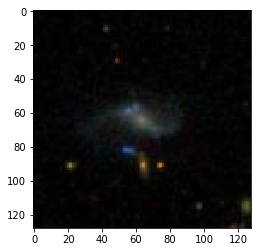

In [11]:
i = 0
print labels_[0][i], labels_[1][i]
plt.imshow(images_[i])

(60468, 128, 128, 3)
(44220, 128, 128, 3)
83


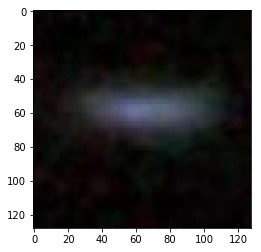

In [12]:
print images_.shape
ix, = np.where(labels_[1,:]>1)

images_c = images_[ix]
labels_c = labels_[1][ix]

print images_c.shape

i = 81
plt.imshow(images_c[i])
print labels_c[i]

(array([3220., 2460., 2532., 3296., 3188., 4936., 4940., 5692., 5208.,
        7552.]),
 array([51. , 54.9, 58.8, 62.7, 66.6, 70.5, 74.4, 78.3, 82.2, 86.1, 90. ]),
 <a list of 10 Patch objects>)

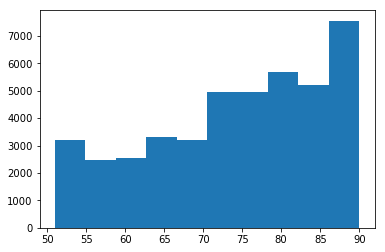

In [13]:
plt.hist(labels_c[labels_c>50])

75


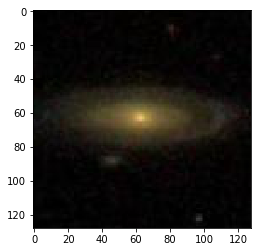

In [14]:
i = 53
print labels_[1][i]
plt.imshow(images_[i])